In [107]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
# Load the data
file_path = 'data/flavor_network_data/scirep-cuisines-detail/map.txt'
mapping = pd.read_csv(file_path, delimiter='\t', header=None, names=['Country', 'Region'])

# Clean the data
mapping['Country'] = data['Country'].str.strip()
mapping['Region'] = data['Region'].str.strip()

# Get unique regions and countries
unique_regions = data['Region'].unique()
unique_countries = data['Country'].unique()

regions_countries = data.groupby('Region')['Country'].apply(list).reset_index()

In [109]:
regions_countries.head(15)

,Region,Country
0,African,"[North-African, South-African, East-African, A..."
1,EastAsian,"[east_asian, chinese, japanese, Korea, China, ..."
2,EasternEuropean,"[EasternEuropean_Russian, Eastern-Europe]"
3,LatinAmerican,"[Caribbean, mexico, Central_SouthAmerican, Sou..."
4,MiddleEastern,"[Turkey, Lebanon, MiddleEastern, Israel, Iran,..."
5,NorthAmerican,"[Canada, Cajun_Creole, American, Southern_Soul..."
6,NorthernEuropean,"[Scandinavia, Scandinavian]"
7,SouthAsian,"[Bangladesh, Indian, Pakistan, India]"
8,SoutheastAsian,"[Vietnamese, Philippines, Indonesia, Vietnam, ..."
9,SouthernEuropean,"[Italy, Mediterranean, Spain, Greek, Italian, ..."


In [110]:
ingredients_df = pd.read_csv('data/recipes.csv')

In [111]:
import pandas as pd

# Define the cuisine mapping with adjectival forms and variations
cuisine_mapping = {
    'vietnamese': ['vietnamese', 'vietnam'],
    'indian': ['indian', 'india'],
    'spanish_portuguese': ['spanish_portuguese'],
    'jewish': ['jewish'],
    'french': ['french', 'france'],
    'central_south_american': ['central_southamerican'],
    'cajun_creole': ['cajun_creole'],
    'thai': ['thai', 'thailand'],
    'scandinavian': ['scandinavian', 'scandinavia'],
    'greek': ['greek'],
    'american': ['american'],
    'african': ['african'],
    'middle_eastern': ['middleeastern', 'middle_eastern', 'turkey', 'iran', 'israel', 'lebanon'],
    'eastern_european_russian': ['easterneuropean_russian', 'eastern-europe', 'russia'],
    'italian': ['italian', 'italy'],
    'irish': ['irish', 'ireland'],
    'mexican': ['mexican', 'mexico'],
    'chinese': ['chinese', 'china'],
    'german': ['german', 'germany'],
    'mediterranean': ['mediterranean'],
    'japanese': ['japanese', 'japan'],
    'moroccan': ['moroccan'],
    'southern_soul_food': ['southern_soulfood'],
    'english_scottish': ['english_scottish', 'uk-and-ireland', 'england', 'scotland'],
    'asian': ['asian'],
    'southwestern': ['southwestern'],
    'east_asian': ['east_asian'],
    'western': ['western'],
    'korean': ['korean', 'korea'],
    'canadian': ['canada'],
    'caribbean': ['caribbean'],
    'bangladeshi': ['bangladesh'],
    'israeli': ['israel'],
    'iranian': ['iran'],
    'south_african': ['south-african'],
    'belgian': ['belgium'],
    'spanish': ['spain'],
    'dutch': ['netherlands'],
    'filipino': ['philippines'],
    'indonesian': ['indonesia'],
    'east_african': ['east-african'],
    'swiss': ['switzerland'],
    'west_african': ['west-african'],
    'north_african': ['north-african'],
    'pakistani': ['pakistan'],
    'portuguese': ['portugal'],
    'malaysian': ['malaysia'],
    'austrian': ['austria']
}

# Reverse the mapping for easier lookup
cuisine_lookup = {alias: cuisine for cuisine, aliases in cuisine_mapping.items() for alias in aliases}



# Create a dictionary from the mapping DataFrame
country_to_region = dict(zip(mapping['Country'].str.lower().str.replace(' ', '_'), mapping['Region'].str.lower().str.replace(' ', '_')))

# Explicitly format region names
def format_region_name(region):
    if pd.isna(region):
        return 'unknown'
    formatted_region = region.replace('southeastasian', 'south_east_asian') \
        .replace('southasian', 'south_asian') \
        .replace('southerneuropean', 'southern_european') \
        .replace('middleeastern', 'middle_eastern') \
        .replace('westerneuropean', 'western_european') \
        .replace('latinamerican', 'latin_american') \
        .replace('northamerican', 'north_american') \
        .replace('northerneuropean', 'northern_european') \
        .replace('easterneuropean', 'eastern_european') \
        .replace('eastasian', 'east_asian')
    return formatted_region

# Function to standardize country names and map to region
def standardize_and_map_region(country):
    if pd.isna(country):
        return 'unknown', 'unknown'
    country_lower = str(country).lower().replace(' ', '_')
    standardized_country = cuisine_lookup.get(country_lower, country_lower)
    region = country_to_region.get(standardized_country, 'unknown')
    return standardized_country, format_region_name(region)



# Apply the function to create new columns
ingredients_df[['country', 'region']] = ingredients_df['country'].apply(lambda x: pd.Series(standardize_and_map_region(x)))

# Move the 'region' column to the beginning
columns = ['region'] + [col for col in ingredients_df if col != 'region']
ingredients_df = ingredients_df[columns]


# Save the updated DataFrame to a new CSV file
ingredients_df.to_csv('data/ingredients_df', index=False)

In [112]:
ingredients_df.country.nunique()

49

In [113]:
ingredients_df.groupby('region')['country'].nunique()

region
african               2
east_asian            4
latin_american        3
middle_eastern        1
north_american        3
northern_european     1
south_asian           1
south_east_asian      2
southern_european     4
unknown              23
western_european      5
Name: country, dtype: int64

In [114]:
ingredients_df.head()

,region,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,south_east_asian,vietnamese,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,south_east_asian,vietnamese,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,south_east_asian,vietnamese,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,south_east_asian,vietnamese,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,south_east_asian,vietnamese,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [115]:
ingredients_df.replace({'Yes': 1, 'No': 0}, inplace=True)

/var/folders/sx/vzszgjy10_z93jmql4144jnm0000gn/T/ipykernel_76513/1972706610.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ingredients_df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [116]:
ingredients_df.head()

,region,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,south_east_asian,vietnamese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,south_east_asian,vietnamese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,south_east_asian,vietnamese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,south_east_asian,vietnamese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,south_east_asian,vietnamese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/sx/vzszgjy10_z93jmql4144jnm0000gn/T/ipykernel_76513/2351779495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


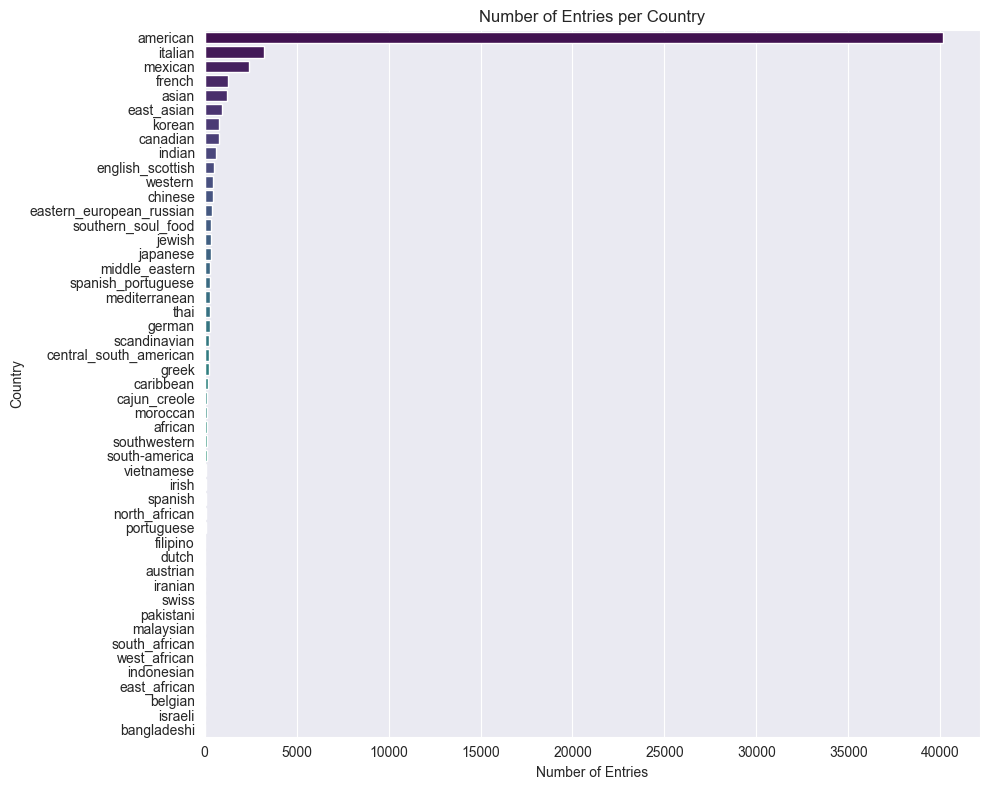

In [117]:
# Count the number of entries per country
country_counts = ingredients_df['country'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Number of Entries per Country')
plt.xlabel('Number of Entries')
plt.ylabel('Country')
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/sx/vzszgjy10_z93jmql4144jnm0000gn/T/ipykernel_76513/2578293642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')


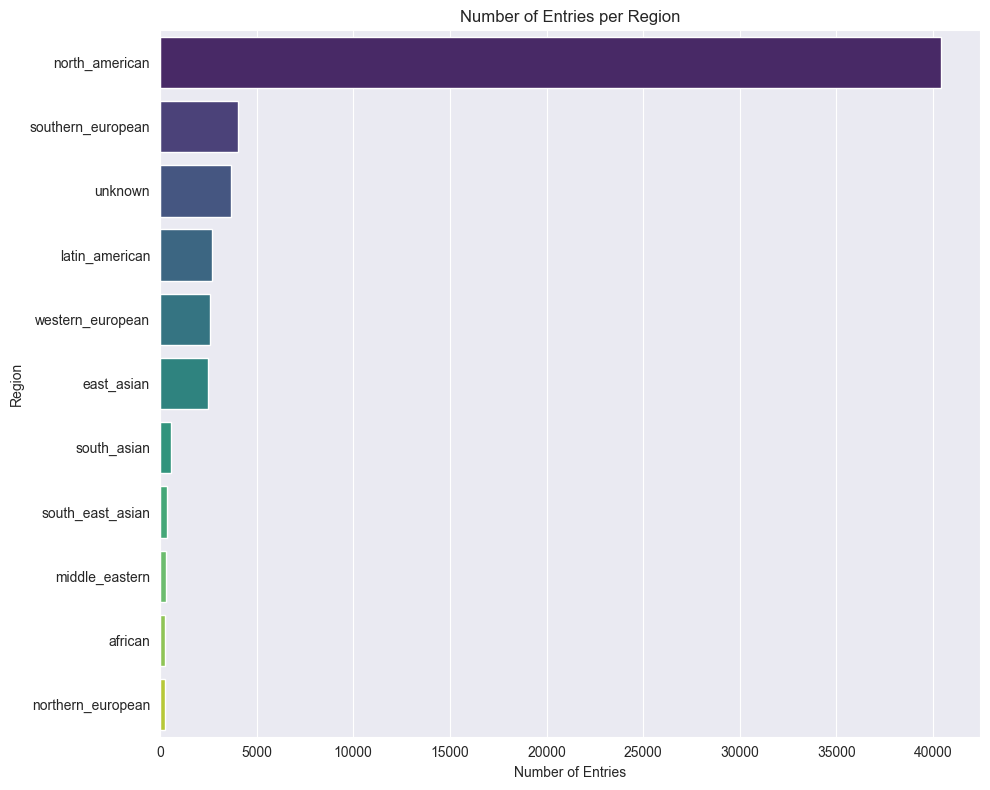

In [118]:
region_counts = ingredients_df['region'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')
plt.title('Number of Entries per Region')
plt.xlabel('Number of Entries')
plt.ylabel('Region')
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/sx/vzszgjy10_z93jmql4144jnm0000gn/T/ipykernel_76513/2237631243.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


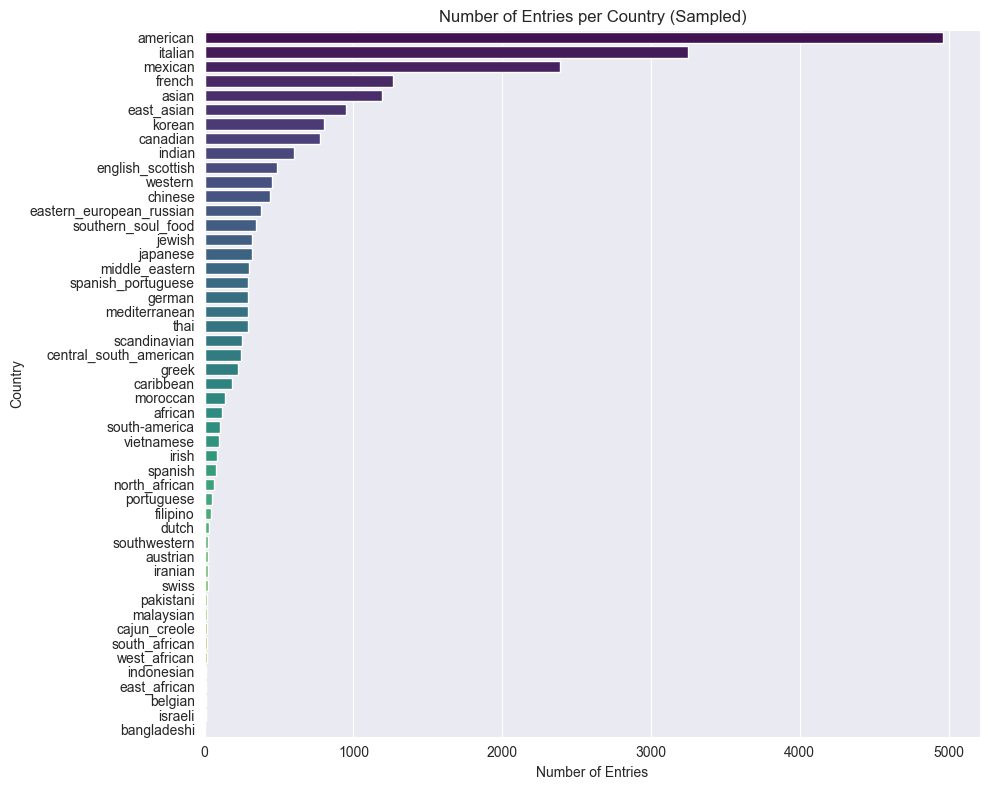

In [119]:
# Filter North American cuisine
north_american_df = ingredients_df[ingredients_df['region'] == 'north_american']

# Randomly sample 5000 observations
north_american_sampled_df = north_american_df.sample(n=5000, random_state=42)

# Combine the sampled North American data with the rest of the DataFrame
other_df = ingredients_df[ingredients_df['region'] != 'north_american']
ingredients_df = pd.concat([other_df, north_american_sampled_df], ignore_index=True)

# Verify the new counts
country_counts = ingredients_df['country'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Number of Entries per Country (Sampled)')
plt.xlabel('Number of Entries')
plt.ylabel('Country')
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/sx/vzszgjy10_z93jmql4144jnm0000gn/T/ipykernel_76513/2578293642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')


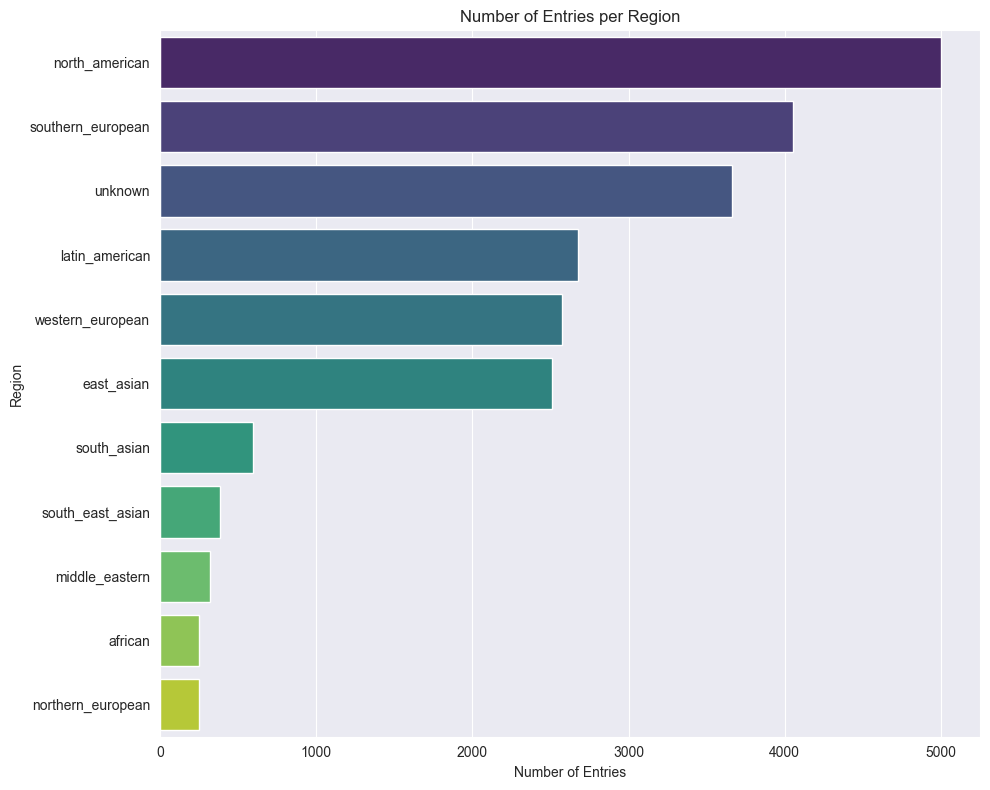

In [120]:
region_counts = ingredients_df['region'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')
plt.title('Number of Entries per Region')
plt.xlabel('Number of Entries')
plt.ylabel('Region')
plt.tight_layout()

# Display the plot
plt.show()

In [122]:
from sklearn.utils import resample

/var/folders/sx/vzszgjy10_z93jmql4144jnm0000gn/T/ipykernel_76513/1838392325.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_country_counts.values, y=filtered_country_counts.index, palette='viridis')


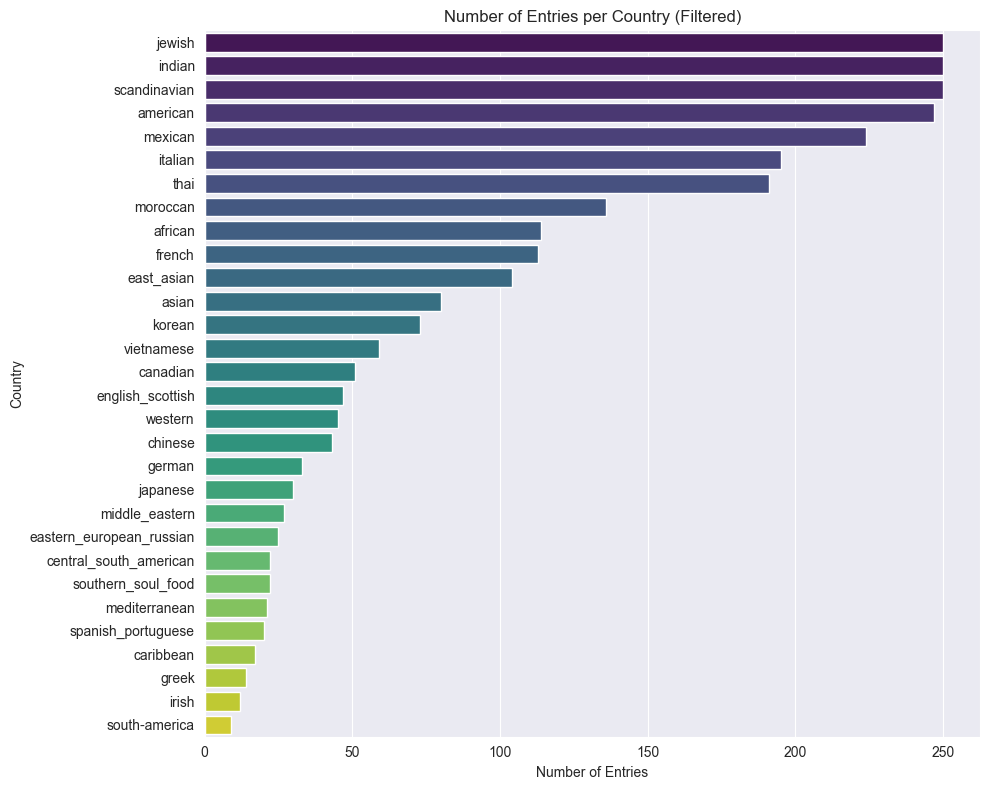

In [121]:
# Find the size of the smallest class
min_class_size = ingredients_df['region'].value_counts().min()

# Separate each class into individual DataFrames
dfs = [df for _, df in ingredients_df.groupby('region')]

# Resample each class to the size of the smallest class
balanced_dfs = [resample(df, replace=False, n_samples=min_class_size, random_state=42) for df in dfs]

# Combine the resampled DataFrames
balanced_df = pd.concat(balanced_dfs, ignore_index=True)

# List of countries to retain
countries_to_retain = balanced_df['country'].value_counts().index[:30]  # Adjust the number based on your requirements

# Filter the DataFrame to retain only the specified countries
filtered_df = balanced_df[balanced_df['country'].isin(countries_to_retain)]

# Verify the new counts
filtered_country_counts = filtered_df['country'].value_counts()

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_country_counts.values, y=filtered_country_counts.index, palette='viridis')
plt.title('Number of Entries per Country (Filtered)')
plt.xlabel('Number of Entries')
plt.ylabel('Country')
plt.tight_layout()

# Display the plot
plt.show()